# Problem Statement

Diminos requires the 95th Percentile of Order Delivery Time to be less than 31 minutes. We need to determine if Kanav's store meets this requirement and identify any areas for improvement.

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset

df = pd.read_csv('diminos_data.csv')

In [ ]:
# top 5 rows

df.head()


,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [ ]:
# Summary of data
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [ ]:
# Convert timestamp columns to datetime objects
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [ ]:
# Calculate delivery time in minutes
df['delivery_time_minutes'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

In [ ]:
# checking top 5 rows
df[['order_id', 'order_placed_at', 'delivery_time_minutes']].head()

,order_id,order_placed_at,delivery_time_minutes
0,1523111,2023-03-01 00:00:59,17.140719
1,1523112,2023-03-01 00:03:59,15.598754
2,1523113,2023-03-01 00:07:22,15.104856
3,1523114,2023-03-01 00:07:47,38.533657
4,1523115,2023-03-01 00:09:03,16.176984


In [ ]:
# Calculate the overall 95th percentile
overall = df['delivery_time_minutes'].quantile(0.95)

print(f"Overall 95th Percentile Delivery Time: {overall:.2f} minutes")

Overall 95th Percentile Delivery Time: 27.26 minutes


27 is safe which less than 31.

## Check for hour of the day

In [ ]:
# Extract hour from the order timestamp
df['hour'] = df['order_placed_at'].dt.hour

In [ ]:
# Calculate 95th percentile for each hour
hourly_stats = df.groupby('hour')['delivery_time_minutes'].quantile(0.95).reset_index()

In [ ]:
# Check for hours that exceed the 31-minute threshold
problem_hours = hourly_stats[hourly_stats['delivery_time_minutes'] > 31]
print("Hours exceeding 31 minutes:")
print(problem_hours)

Hours exceeding 31 minutes:
    hour  delivery_time_minutes
1      1              32.104821
11    11              33.407016
16    16              32.438371


the store fails during three specific hours of the day

## Check for Day of Week

In [ ]:
# Extract day name
df['day_of_week'] = df['order_placed_at'].dt.day_name()

In [ ]:
# Calculate 95th percentile by day
daily_stats = df.groupby('day_of_week')['delivery_time_minutes'].quantile(0.95)
print(daily_stats)

day_of_week
Friday       26.331713
Monday       28.737349
Saturday     26.935257
Sunday       26.517667
Thursday     26.534242
Tuesday      29.397539
Wednesday    26.442186
Name: delivery_time_minutes, dtype: float64


In [ ]:
# plot style
sns.set(style="whitegrid")

In [ ]:
# data for plotting
hourly_stats_df = hourly_stats.copy()
hourly_stats_df.columns = ['Hour', '95th Percentile Delivery Time']

daily_stats_df = daily_stats.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
daily_stats_df.columns = ['Day', '95th Percentile Delivery Time']

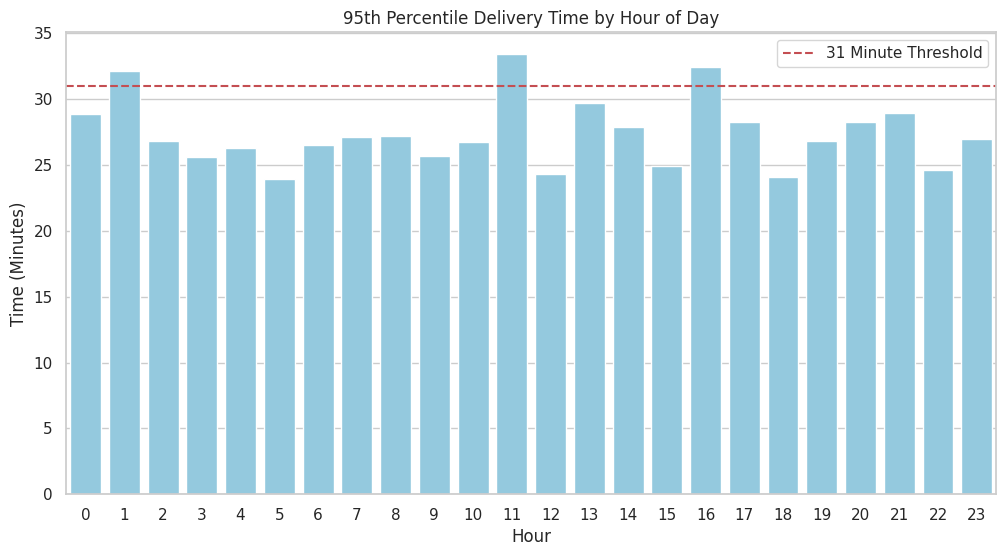

In [ ]:
# Hourly Performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='95th Percentile Delivery Time', data=hourly_stats_df, color='skyblue')
plt.axhline(y=31, color='r', linestyle='--', label='31 Minute Threshold')
plt.title('95th Percentile Delivery Time by Hour of Day')
plt.ylabel('Time (Minutes)')
plt.legend()

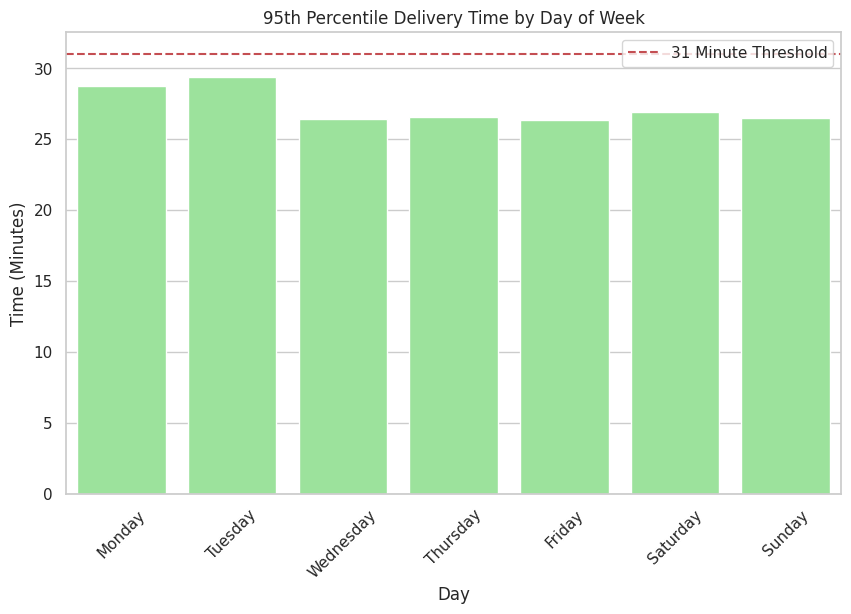

In [ ]:
# Daily Performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='95th Percentile Delivery Time', data=daily_stats_df, color='lightgreen')
plt.axhline(y=31, color='r', linestyle='--', label='31 Minute Threshold')
plt.title('95th Percentile Delivery Time by Day of Week')
plt.ylabel('Time (Minutes)')
plt.xticks(rotation=45)
plt.legend()

# Overview

The overall 95th Percentile Delivery Time is 27.26 minutes

Which is below the 31-minute threshold.

overall numbers are good, but there are three specific times of day where the store misses the 31-minute target:

*   01:00 AM
*   11:00 AM
*   04:00 PM




